In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import os

import warnings
warnings.filterwarnings('ignore')

In [17]:
fold = 0
path = 'models_DART_all_277corr_10folds/'
for fname in os.listdir(path):
            if fname.startswith("HT0_fold_{}_iter".format(fold)):
                print(fname)
                model = joblib.load(path + fname)
                # model.save_model(path + 'cp_{}_model.txt'.format(fold))

HT0_fold_0_iter_13116_score_0.80216.pkl


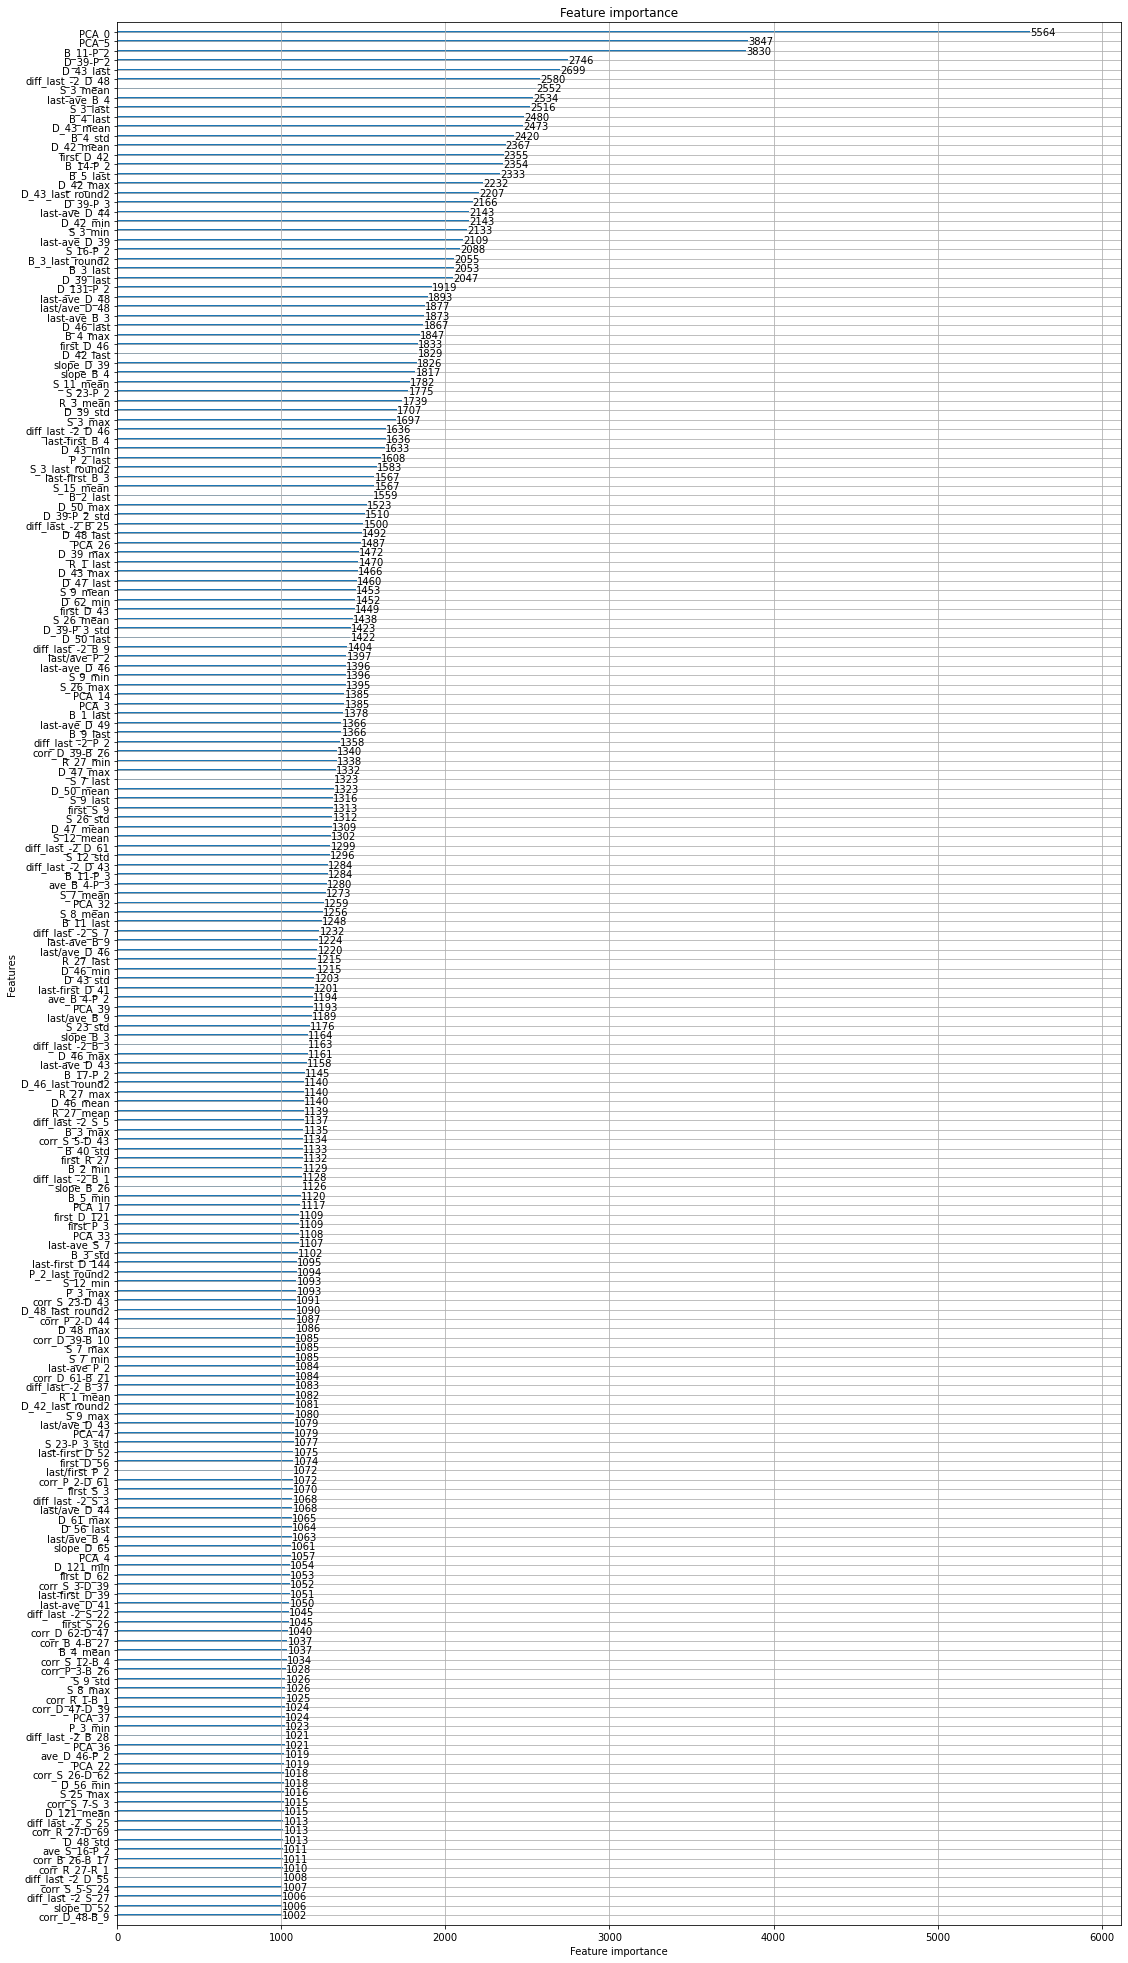

In [18]:
plt.rcParams["figure.figsize"] = (18, 35)
lgb.plot_importance(model, importance_type='split' , max_num_features=200);

In [19]:
fe = model.feature_importance(importance_type='split')
fn = model.feature_name()
df = pd.DataFrame(fe, index=fn, columns=['importance'])
df.sort_values(by='importance', ascending=False, inplace=True)
df.reset_index(inplace=True)

In [20]:
df.head(20)

,index,importance
0,PCA_0,5564
1,PCA_5,3847
2,B_11-P_2,3830
3,D_39-P_2,2746
4,D_43_last,2699
5,diff_last_-2_D_48,2580
6,S_3_mean,2552
7,last-ave_B_4,2534
8,S_3_last,2516
9,B_4_last,2480


In [21]:
df[df.importance == 0].shape

(353, 2)

In [31]:
df[df['index'].str.startswith('corr_')]

,index,importance
76,corr_D_39-B_26,1340
117,corr_S_5-D_43,1134
134,corr_S_23-D_43,1091
136,corr_P_2-D_44,1087
138,corr_D_39-B_10,1085
...,...,...
772,corr_S_5-B_11,765
775,corr_S_17-S_12,764
780,corr_S_3-B_11,761
785,corr_D_47-D_144,760


In [22]:
df[df['index'].str.startswith('ave_')]

,index,importance
90,ave_B_4-P_3,1280
102,ave_B_4-P_2,1194
182,ave_D_46-P_2,1019
193,ave_S_16-P_2,1011
202,ave_B_11-P_2,999
507,ave_D_46-P_3,866
543,ave_D_131-P_3,857
552,ave_S_23-P_2,855
557,ave_S_16-P_3,853
623,ave_D_39-P_3,827


In [23]:
df[df['index'].str.startswith('cat_')]

,index,importance
1467,cat_-2_D_66,366
1535,cat_-2_D_117,292
1636,cat_-2_D_64,207
1682,cat_first_D_117,171
1741,cat_first_B_38,142
1792,cat_-2_D_114,119
1799,cat_first_D_66,116
1863,cat_first_D_64,90
1884,cat_-2_B_38,81
1909,cat_first_D_114,75


In [24]:
df[df['index'].str.startswith('NA_')]

,index,importance
1555,NA_D_77,268
1680,NA_D_50,172
1739,NA_S_9,143
1743,NA_D_43,141
1786,NA_D_56,119
...,...,...
2865,NA_D_74,0
2866,NA_P_4,0
2867,NA_D_73,0
2868,NA_B_23,0


In [25]:
df[df['index'].str.startswith('diff_last_')]

,index,importance
5,diff_last_-2_D_48,2580
43,diff_last_-2_D_46,1636
52,diff_last_-2_B_25,1500
65,diff_last_-2_B_9,1404
75,diff_last_-2_P_2,1358
...,...,...
2644,diff_last_-2_D_86,0
2646,diff_last_-2_R_13,0
2647,diff_last_-2_D_82,0
2648,diff_last_-2_D_81,0


In [26]:
df[df['index'].str.startswith('date_')]

,index,importance
707,date_day_mean,789
854,date_weekday_mean,734
1098,date_day_last,631
1437,date_day_first,397
1590,date_day_max,242
1603,date_day_min,230
1640,date_weekday_first,206
1685,date_weekday_last,166
2065,date_month_mean,38
2112,date_weekday_max,31


In [27]:
df[df['index'].str.startswith('last/')]

,index,importance
29,last/ave_D_48,1877
66,last/ave_P_2,1397
97,last/ave_D_46,1220
104,last/ave_B_9,1189
147,last/ave_D_43,1079
...,...,...
2749,last/first_D_88,0
2750,last/first_B_31,0
2793,last/ave_R_25,0
2835,last/ave_R_23,0


In [28]:
df[df['index'].str.startswith('slope_')]

,index,importance
35,slope_D_39,1826
36,slope_B_4,1817
106,slope_B_3,1164
122,slope_B_26,1126
160,slope_D_65,1061
...,...,...
2598,slope_D_93,0
2599,slope_B_42,0
2600,slope_R_28,0
2601,slope_D_134,0


In [29]:
df[df['index'].str.startswith('PCA_')]

,index,importance
0,PCA_0,5564
1,PCA_5,3847
54,PCA_26,1487
70,PCA_3,1385
71,PCA_14,1385
92,PCA_32,1259
103,PCA_39,1193
124,PCA_17,1117
127,PCA_33,1108
148,PCA_47,1079
